In [1]:
import pencil as pc
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 11})

In [3]:
sim = pc.get_sim()

In [4]:
#reading the grid
grid = sim.grid
z = grid.z

In [5]:
ts=pc.read.ts()

Read 27436 lines.


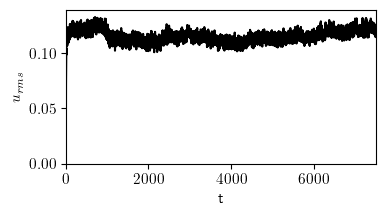

In [6]:
plt.figure(figsize=(4,2))
plt.plot(ts.t, ts.urms, c='k')
plt.xlim(ts.t[0], ts.t[-1])
plt.ylim(0, )
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [7]:
#for exp fitting
def f(t, a, b):
    return a*np.exp(t*b)

i1 = np.argmin(abs(ts.t-200))
j1 = np.argmin(abs(ts.t-900))

t_exp = ts.t[i1:j1]
b_exp = ts.brms[i1:j1]

popt1, pcov2 = curve_fit(f, t_exp, b_exp, [0,0.0016])

t_fit1 = ts.t[i1-100:j1+100]
b_fit1 = f(t_fit1, popt1[0], popt1[1])
grow=round(popt1[1],3)
grow

0.015

In [8]:
#for st_li2ne fi2tti2ng
def g(t, a, b):
    return a*t+b

i2 = np.argmin(abs(ts.t-1400))
j2 = np.argmin(abs(ts.t-3500))

t_lin = ts.t[i2:j2]
b_lin = ts.brms[i2:j2]

popt2, pcov2 = curve_fit(g, t_lin, b_lin)

t_fit2 = ts.t[i2-300:j2+100]
b_fit2 = g(t_fit2, popt2[0], popt2[1])
b = round(np.average(b_fit2),3)
b

0.151

In [9]:
popt2

array([3.32864136e-06, 1.42636638e-01])

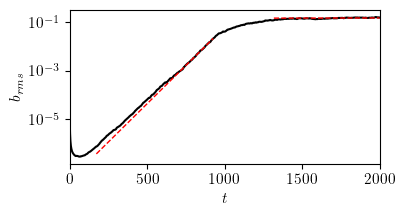

In [10]:
plt.figure(figsize=(4,2))
plt.rcParams.update({'font.size': 11})
plt.plot(ts.t, ts.brms, c='k')
plt.plot(t_fit1, b_fit1, linewidth=1, linestyle = '--', color='r')
plt.plot(t_fit2, b_fit2, linewidth=1, linestyle = '--', color='r')
plt.yscale("log")
plt.savefig('output.jpg')
plt.xlim(ts.t[0],ts.t[-1])
plt.xlim(ts.t[0],2000)
plt.xlabel(r'$t$')
plt.ylabel(r'$b_{rms}$')
# plt.legend()
# plt.grid()
plt.show()

In [11]:
xya = pc.read.aver(plane_list="xy")
rho = xya.xy.rhomz
# pre = xya.xy.ppmz
# tem = xya.xy.TTmz

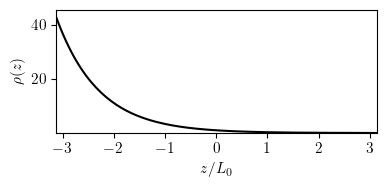

In [12]:
fig, axs = plt.subplots(1,1, figsize=(4,2), sharex=True)

axs.plot(z, rho[-1,:], color='k')

# axs.axvline(x=0, c='r', ls=':')
# axs.set_yscale("log")
axs.set_xlim(z[0], z[-1])
axs.set_ylim(rho[-1,-1], )
axs.set_ylabel(r"$\rho(z)$")

plt.xlabel(r"$z/L_0$")
plt.tight_layout()
#plt.savefig("variation.jpg")

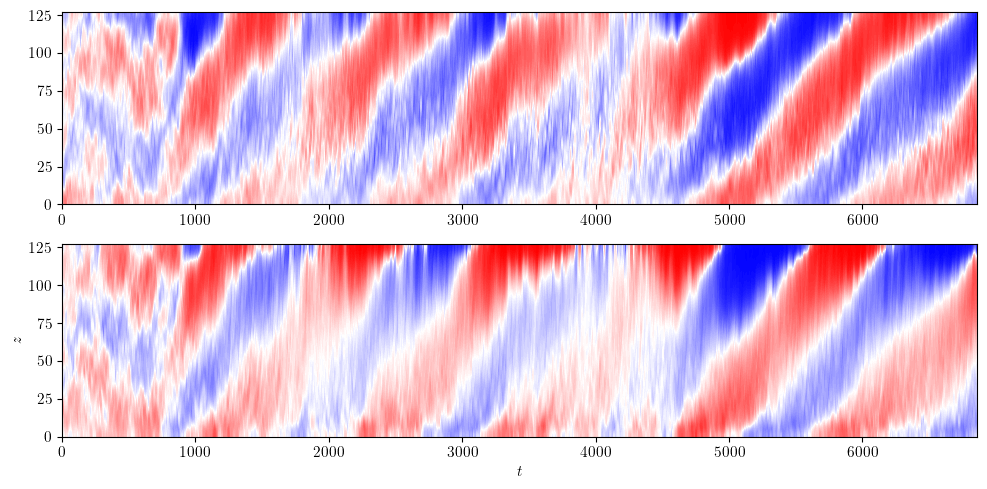

In [13]:
import pencil as pc
import matplotlib.pylab as plt
import matplotlib.colors as colors
import numpy as np

xya=pc.read.aver(plane_list=['xy'])
bxmz=xya.xy.bxmz
bx2mz=xya.xy.bx2mz
bymz=xya.xy.bymz
by2mz=xya.xy.by2mz

bxmz_n=bxmz/np.sqrt(bx2mz)
bymz_n=bymz/np.sqrt(by2mz)

fig, axs = plt.subplots(2,1, figsize=(10,5))
axs[0].contourf(np.transpose(bxmz_n),100,cmap='bwr')
axs[1].contourf(np.transpose(bymz_n),100,cmap='bwr')
plt.xlabel(r'$t$')
plt.ylabel(r'$z$')
# plt.colorbar()
plt.tight_layout()

plt.show()

In [14]:
varlist = sim.get_varlist()

In [15]:
len(varlist)

151

In [16]:
# var1 = pc.read.var(varlist[0], trimall=True)
# var2 = pc.read.var(varlist[20], trimall=True)
# var3 = pc.read.var(varlist[40], trimall=True)
# var4 = pc.read.var(varlist[100], trimall=True)
# var5 = pc.read.var(varlist[150], trimall=True)
# var6 = pc.read.var(varlist[-1], trimall=True)

In [17]:
# fig, axs = plt.subplots(3,2, figsize=(6,10))

# axs[0,0].imshow(var1.ax[1,:,:], interpolation='nearest', origin="lower", cmap='magma')
# axs[0,1].imshow(var2.ax[1,:,:], interpolation='nearest', origin="lower", cmap='magma')
# axs[1,0].imshow(var3.ax[1,:,:], interpolation='nearest', origin="lower", cmap='magma')
# axs[1,1].imshow(var4.ax[1,:,:], interpolation='nearest', origin="lower", cmap='magma')
# axs[2,0].imshow(var5.ax[1,:,:], interpolation='nearest', origin="lower", cmap='magma')
# axs[2,1].imshow(var6.ax[1,:,:], interpolation='nearest', origin="lower", cmap='magma')
# #axs[1,1].imshow(var.ax[1,:,:], interpolation='nearest', origin="lower", cmap='magma')
# fig.text(0.5, 0.08, 'x', ha='center')
# fig.text(0.04, 0.5, 'y', va='center', rotation='vertical')
# #plt.tight_layout()
# # plt.savefig('slices.png', dpi=100)
# plt.show()

In [18]:
power = pc.read.power()

power_krms.dat


power_mag.dat
powerhel_kin.dat
power_kin.dat
powerhel_mag.dat
powerbz_xy.dat


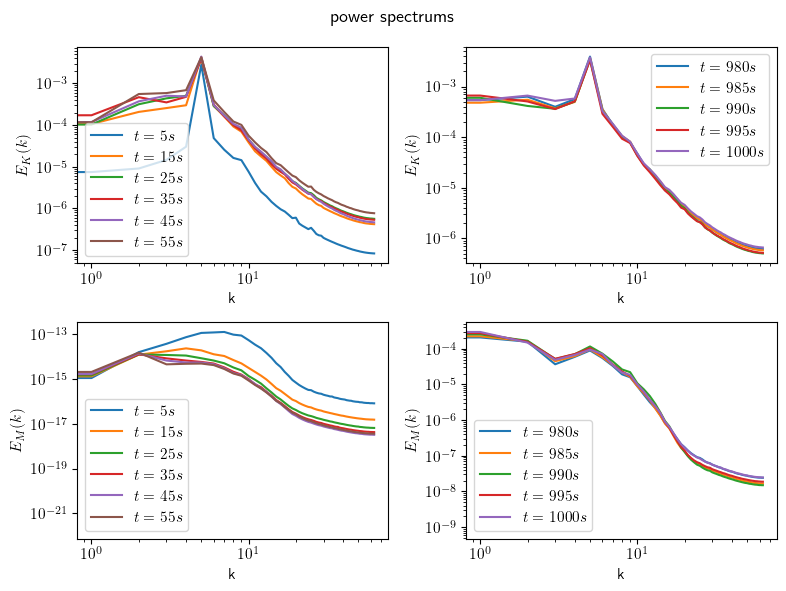

In [19]:
#power.u.shape
indx = 200

fig, axs = plt.subplots(2,2, figsize=(8,6))#sharex=True, figsize=(8,6))
for i in range(0,11,2):
    axs[0,0].plot(power.kin[i,0:], label=fr'$t={power.t[i]:.0f} s$')
# axs[0,0].set_xlim(1,15)
# axs[0,0].set_ylim(0,)
axs[0,0].set_xscale('log')
axs[0,0].set_yscale('log')
axs[0,0].set_xlabel('k')
axs[0,0].set_ylabel(r'$E_K(k)$')
axs[0,0].legend()

for i in range(5,0,-1):
    axs[0,1].plot(power.kin[indx-i,0:], label=fr'$t={power.t[indx-i]:.0f} s$')
# axs[0,1].set_xlim(1,15)
# axs[0,1].set_ylim(0,)
axs[0,1].set_xscale('log')
axs[0,1].set_yscale('log')
axs[0,1].set_xlabel('k')
axs[0,1].set_ylabel(r'$E_K(k)$')
axs[0,1].legend()

for i in range(0,11,2):
    # axs[1,0].plot(power.mag[i,0:]*10**13, label=fr'$t={power.t[i]:.0f} s$')
    axs[1,0].plot(power.mag[i,0:], label=fr'$t={power.t[i]:.0f} s$')
# axs[1,0].set_xlim(1,15)
# axs[1,0].set_ylim(0,)
axs[1,0].set_xscale('log')
axs[1,0].set_yscale('log')
# axs[1,0].set_xscale('log')
axs[1,0].set_xlabel('k')
axs[1,0].set_ylabel(r'$E_M(k)$')# $in$ $10^{-13}$')
axs[1,0].legend()

for i in range(5,0,-1):
    axs[1,1].plot(power.mag[indx-i,0:], label=fr'$t={power.t[indx-i]:.0f} s$')
# axs[1,1].set_xlim(1,15)
# axs[1,1].set_ylim(0,)
axs[1,1].set_xscale('log')
axs[1,1].set_yscale('log')
# axs[1,1].set_xticks(np.arange(1, 16, step=2))
axs[1,1].set_xlabel('k')
axs[1,1].set_ylabel(r'$E_M(k)$')
axs[1,1].legend()
plt.suptitle("power spectrums")
fig.tight_layout()
plt.show()

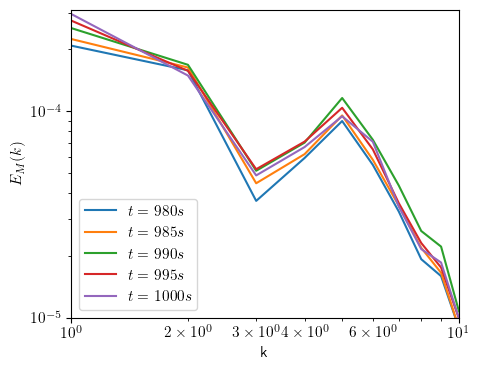

In [20]:
indx = 200
fig, axs = plt.subplots(1,1, figsize=(5,4))#sharex=True, figsize=(8,6))

for i in range(5,0,-1):
# for i in range(10,0,-2):
    axs.plot(power.mag[indx-i,0:], label=fr'$t={power.t[indx-i]:.0f} s$')
axs.set_xlim(1,10)
axs.set_ylim(0.00001,)
axs.set_xscale('log')
axs.set_yscale('log')
# axs.set_xticks(np.arange(1, 16, step=2))
axs.set_xlabel('k')
axs.set_ylabel(r'$E_M(k)$')
axs.legend()
plt.show()

In [21]:
power.mag.shape

(1501, 64)

In [22]:
# linestyle_tuple[]

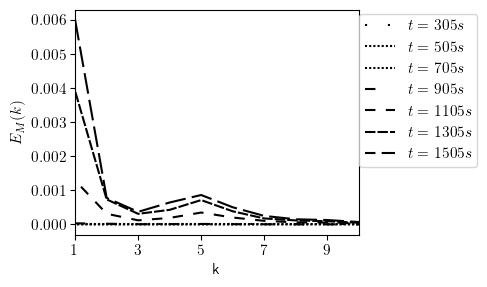

In [23]:
plt.figure(figsize=(5,3))
ls = ["-", "--", "-.", ":", "-", 'long dash with offset']
lw = [1, 1, 1, 1, 1, 2]

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),
     ('long dash with offset', (5, (10, 3))),
     
     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

# plt.rcParams['text.usetex'] = True
# plt.rcParams.update({'font.size': 11})
# plt.rc('font', family='arial')
# plt.rc("figure.subplot", left=0.2)
# plt.rc("figure.subplot", right=0.95)
# plt.rc("figure.subplot", bottom=0.15)
# plt.rc("figure.subplot", top=0.90)

j=0
for i in range(60,340,40):
    plt.plot(power.mag[i,0:], linestyle=linestyle_tuple[j][1], color='k', label=fr'$t={power.t[i]:.0f} s$')
    j=j+1
# plt.xscale("log")
plt.xlim(1,10)
#plt.ylim(0,0.0075)
plt.xticks(np.arange(1, 11, step=2))
plt.xlabel('k')
plt.ylabel(r'$E_M(k)$')
plt.legend(loc=(1,0.3))
plt.tight_layout()
#plt.savefig('power_mag.jpg')
plt.show()

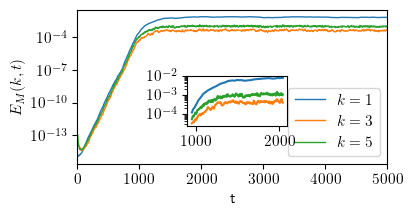

In [24]:
upto = 1000
Y_detail = []
plt.figure(figsize=(4,2))
for i in range(1,6,2):
    plt.plot(power.t[:upto], power.mag[:upto,i], lw=1, label=fr'$k={i}$')
    Y_detail.append(power.mag[np.argmin(np.abs(power.t-950)):np.argmin(np.abs(power.t-2050)),i])

# Generate data for the zoomed portion
X_detail = power.t[np.argmin(np.abs(power.t-950)):np.argmin(np.abs(power.t-2050))]


plt.yscale("log")
plt.xlim(0,power.t[upto])
#plt.ylim(0,)
plt.xlabel('t')
plt.ylabel(r'$E_M(k,t)$')
plt.legend()
# location for the zoomed portion
sub_axes = plt.axes([.4, .3, .25, .25])

# plot the zoomed portion
for i in range(0,3):
    sub_axes.plot(X_detail, Y_detail[i])
sub_axes.set_yscale('log')
plt.show()

In [25]:
# vars = np.zeros()
var = pc.read.var(var_file='VAR130', trimall=True)

In [26]:
# z.shape

In [27]:
uz = var.uz[:,:,np.argmin(np.abs(z-0))]

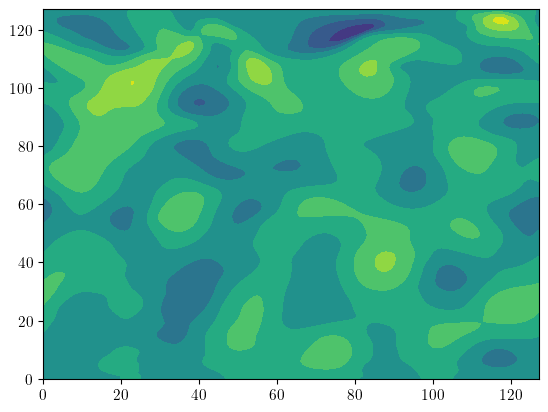

In [28]:
plt.contourf(uz)